<a href="https://colab.research.google.com/github/ruklankularatne/UoM_MapReduce-vs-Spark/blob/main/239160P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
delayed_flight = pd.read_csv("DelayedFlights-updated.csv")
delayed_flight.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,2003,6,17,2,1310,1255,1612.0,1615,AA,...,6.0,23,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2,2003,6,20,5,1303,1255,1623.0,1615,AA,...,11.0,29,0,N,0,NaN,NaN,NaN,NaN,NaN
2,3,2003,6,22,7,1325,1255,1953.0,1615,AA,...,9.0,206,0,N,0,0.0,0.0,218.0,0.0,0.0
3,4,2003,6,23,1,1328,1255,1655.0,1615,AA,...,8.0,32,0,N,0,0.0,0.0,40.0,0.0,0.0
4,5,2003,6,25,3,1307,1255,1620.0,1615,AA,...,12.0,20,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
delayed_flight.dtypes

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime                int64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay               int64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

#### Finding missing values

In [6]:
delayed_flight.isna().sum()

Unnamed: 0             0
Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
DepTime                0
CRSDepTime             0
ArrTime               10
CRSArrTime             0
UniqueCarrier          0
FlightNum              0
TailNum                0
ActualElapsedTime     10
CRSElapsedTime         0
AirTime               10
ArrDelay              10
DepDelay               0
Origin                 0
Dest                   0
Distance               0
TaxiIn                10
TaxiOut                0
Cancelled              0
CancellationCode       0
Diverted               0
CarrierDelay         240
WeatherDelay         240
NASDelay             240
SecurityDelay        240
LateAircraftDelay    240
dtype: int64

##### Checking distributions of the five columns

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


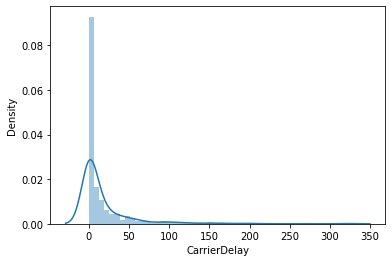

In [7]:
sns.distplot(delayed_flight['CarrierDelay'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


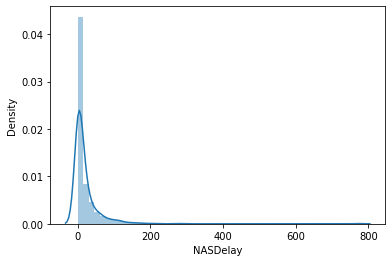

In [8]:
sns.distplot(delayed_flight['NASDelay'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


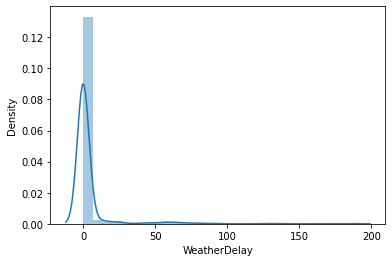

In [9]:
sns.distplot(delayed_flight['WeatherDelay'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


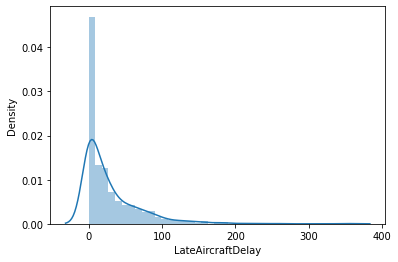

In [10]:
sns.distplot(delayed_flight['LateAircraftDelay'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


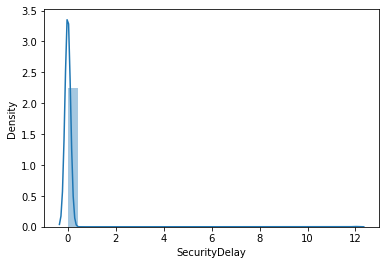

In [11]:
sns.distplot(delayed_flight['SecurityDelay'])
plt.show()

##### Since distributions are skewed - Imputing missing values with median

In [12]:
delayed_flight["CarrierDelay"] = delayed_flight["CarrierDelay"].fillna(delayed_flight["CarrierDelay"].median())
delayed_flight["NASDelay"] = delayed_flight["NASDelay"].fillna(delayed_flight["NASDelay"].median())
delayed_flight["WeatherDelay"] = delayed_flight["WeatherDelay"].fillna(delayed_flight["WeatherDelay"].median())
delayed_flight["LateAircraftDelay"] = delayed_flight["LateAircraftDelay"].fillna(delayed_flight["LateAircraftDelay"].median())
delayed_flight["SecurityDelay"] = delayed_flight["SecurityDelay"].fillna(delayed_flight["SecurityDelay"].median())


In [15]:
delayed_flight.to_csv("DelayedFlights- cleaned.csv")